# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

760

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [112]:
url = "http://api.openweathermap.org/data/2.5/weather?"
weather_check = {}

print('Beginning Data Retrieval')
print('-----------------------------')
count = 1
for city in cities:
    query_url = url + "appid=" + api_key + '&q=' + city
    response = requests.get(query_url)
    weather_json = response.json()
    try:
        weather_json['coord']
    except KeyError:
        print("City not found. Skipping...")
        continue

    print(f"Processing Record {count} | {city}")
    count += 1
    weather_check[city] = {'Name': weather_json['name'], 'Cloudiness': weather_json['clouds']['all'], 'Country': weather_json['sys']['country'], 'Date': weather_json['dt'], 'Humidity': weather_json['main']['humidity'], 'Lat': weather_json['coord']['lat'], 'Lon': weather_json['coord']['lon'], 'Max Temp': weather_json['main']['temp_max'], 'Wind Speed': weather_json['wind']['speed']}
    
    

Beginning Data Retrieval
-----------------------------
Processing Record 1 | naze
City not found. Skipping...
Processing Record 2 | boysun
Processing Record 3 | boguchany
Processing Record 4 | bethel
Processing Record 5 | vestmannaeyjar
Processing Record 6 | lorengau
Processing Record 7 | iqaluit
Processing Record 8 | bluff
Processing Record 9 | severo-kurilsk
City not found. Skipping...
Processing Record 10 | lamar
Processing Record 11 | san patricio
Processing Record 12 | kapaa
Processing Record 13 | ushuaia
Processing Record 14 | vaini
Processing Record 15 | havre-saint-pierre
Processing Record 16 | ngerengere
Processing Record 17 | lata
Processing Record 18 | tazovskiy
Processing Record 19 | cidreira
Processing Record 20 | north platte
City not found. Skipping...
Processing Record 21 | grindavik
Processing Record 22 | puerto ayora
Processing Record 23 | vuktyl
Processing Record 24 | erzin
Processing Record 25 | chokurdakh
Processing Record 26 | guerrero negro
Processing Record 27 |

Processing Record 227 | grand gaube
Processing Record 228 | san jose
Processing Record 229 | tasiilaq
Processing Record 230 | zhigansk
Processing Record 231 | orotina
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 232 | sorland
Processing Record 233 | partizanske
Processing Record 234 | dwarka
Processing Record 235 | kavieng
Processing Record 236 | yuyao
Processing Record 237 | dingle
Processing Record 238 | sept-iles
Processing Record 239 | huarmey
Processing Record 240 | monrovia
Processing Record 241 | lavrentiya
Processing Record 242 | saint anthony
City not found. Skipping...
City not found. Skipping...
Processing Record 243 | faanui
Processing Record 244 | namibe
Processing Record 245 | evanston
Processing Record 246 | nome
Processing Record 247 | vanimo
Processing Record 248 | siocon
Processing Record 249 | vicosa
Processing Record 250 | vagur
Processing Record 251 | santa maria
Processing Record 252 | myanaung
Processing Re

Processing Record 451 | hami
Processing Record 452 | codrington
Processing Record 453 | yulara
Processing Record 454 | hualmay
Processing Record 455 | bara
Processing Record 456 | robertsport
Processing Record 457 | ishinomaki
Processing Record 458 | mount vernon
Processing Record 459 | neiafu
Processing Record 460 | bubanza
Processing Record 461 | bathsheba
Processing Record 462 | aguachica
Processing Record 463 | hare bay
Processing Record 464 | manyana
Processing Record 465 | bonthe
Processing Record 466 | slave lake
Processing Record 467 | mitsamiouli
Processing Record 468 | nyurba
Processing Record 469 | cap-aux-meules
Processing Record 470 | choma
Processing Record 471 | fairview
Processing Record 472 | betare oya
Processing Record 473 | iquitos
Processing Record 474 | kuleshovka
Processing Record 475 | coquimbo
Processing Record 476 | sur
Processing Record 477 | riohacha
Processing Record 478 | awbari
Processing Record 479 | ajdabiya
Processing Record 480 | aksarka
City not foun

Processing Record 680 | viedma
Processing Record 681 | hambantota
Processing Record 682 | opuwo
Processing Record 683 | riviere-au-renard


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [126]:
df = pd.DataFrame(weather_check).T
df = df.reset_index(drop = True)
df = df[['Name', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed']]
df.to_csv('../Weatherpy.csv')
df.head()

,Name,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Naze,100,NG,1567709961,95,5.43,7.07,296.983,1.99
1,Boysun,0,UZ,1567709961,57,38.2,67.2,281.883,3.25
2,Boguchany,95,RU,1567709961,95,58.38,97.46,280.983,1.83
3,Bethel,90,US,1567709961,87,60.79,-161.76,284.15,7.2
4,Vestmannaeyjar,90,IS,1567709962,100,63.44,-20.27,283.15,7.7


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [114]:
df.astype({'Cloudiness': 'int32', 'Humidity': 'int32', 'Lat': 'float', 'Lon': 'float', 'Max Temp': 'float', 'Wind Speed': 'float'})
df.loc[df['Humidity'] > 100]

,Name,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
72,Paita,0,PE,1567709985,290,-5.09,-81.11,290.15,5.1
79,San Jeronimo,90,PE,1567709986,328,-13.65,-73.37,276.15,3.1
196,Seoul,75,KR,1567709702,106,37.57,126.98,296.15,1.5
356,Pucallpa,75,PE,1567710050,331,-8.38,-74.54,275.15,2.6
414,Yurimaguas,75,PE,1567710005,310,-5.9,-76.1,282.15,0.56
472,Iquitos,75,PE,1567710068,319,-3.75,-73.25,279.15,1.5


#### Latitude vs. Temperature Plot

In [115]:
df.dtypes

Name          object
Cloudiness    object
Country       object
Date          object
Humidity      object
Lat           object
Lon           object
Max Temp      object
Wind Speed    object
dtype: object

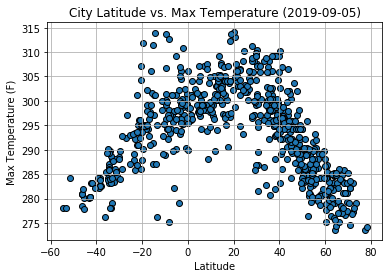

In [121]:
lat = df['Lat']
mt = df['Max Temp']
pd.to_numeric(lat)
pd.to_numeric(mt)
plt.scatter(x = lat, y = mt, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({date.today()})')
plt.grid(True)
plt.savefig('../Images/City_Latitude vs. Max Temperature.png')
plt.show()

#### Latitude vs. Humidity Plot

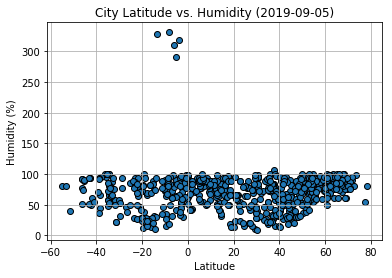

In [122]:
hum = df['Humidity']
pd.to_numeric(hum)
plt.scatter(x = lat, y = hum, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({date.today()})')
plt.grid(True)
plt.savefig('../Images/City_Latitude vs. Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

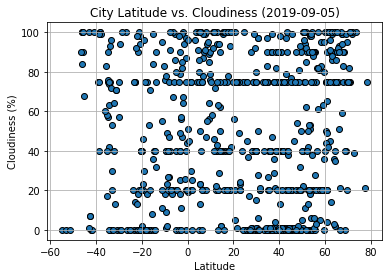

In [123]:
cld = df['Cloudiness']
pd.to_numeric(cld)

plt.scatter(x = lat, y = cld, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({date.today()})')
plt.grid(True)
plt.savefig('../Images/City_Latitude vs. Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

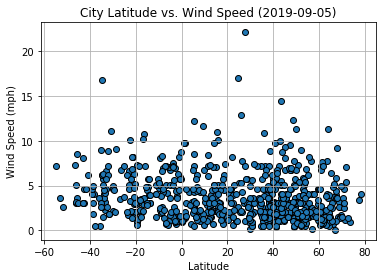

In [124]:
wspd = df['Wind Speed']
pd.to_numeric(wspd)
plt.scatter(x = lat, y = wspd, edgecolors = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({date.today()})')
plt.grid(True)
plt.savefig('../Images/City_Latitude vs. Wind_Speed.png')
plt.show()